# Income Qualification Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.options.display.max_rows = None

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


### Task 1: Identify the output variable.

In [6]:
print("The output variable is 'Target' of train_data (level of income qualification)")

The output variable is 'Target' of train_data (level of income qualification)


### Task 2: Understand the type of data.

In [7]:
train_data.shape

(9557, 143)

In [8]:
train_data.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [9]:
test_data.shape

(23856, 142)

In [10]:
test_data.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

### Task 3, 7, 8: Check if there are any biases and Null Values in your dataset and remove the Null Values

In [11]:
train_data.head(n = 3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [12]:
test_data.head(n = 3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681


In [13]:
train_data.select_dtypes(include='object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [14]:
test_data.select_dtypes(include='object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [15]:
# 'Id' and 'idhogar' are identifiers, therefore these can be dropped from the dataset for analysis

train_data.drop(['Id','idhogar'], axis = 1, inplace=True)
test_data.drop(['Id','idhogar'], axis = 1, inplace=True)

In [16]:
train_data.dtypes[train_data.dtypes == 'object'] 

dependency    object
edjefe        object
edjefa        object
dtype: object

In [17]:
test_data.dtypes[train_data.dtypes == 'object'] 

dependency    object
edjefe        object
edjefa        object
dtype: object

In [18]:
train_data['dependency'].isnull().any(), test_data['dependency'].isnull().any()

(False, False)

In [19]:
train_data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [20]:
test_data['dependency'].unique()

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [22]:
dependency_values_train = train_data[train_data['dependency'].isin(['yes', 'no']) == False]['dependency']
dependency_values_test  = test_data[test_data['dependency'].isin(['yes','no']) == False]['dependency']

In [24]:
dependency_values_train = dependency_values_train.astype('float64')
dependency_values_test = dependency_values_test.astype('float64')

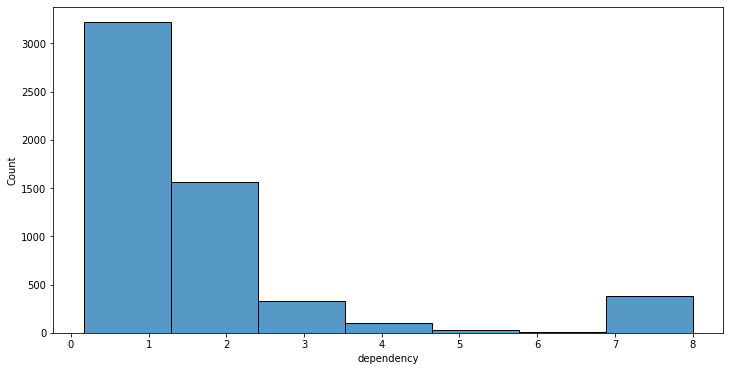

In [26]:
plt.figure(figsize=(12,6))
sns.histplot( x = dependency_values_train, bins = 7)
plt.show()

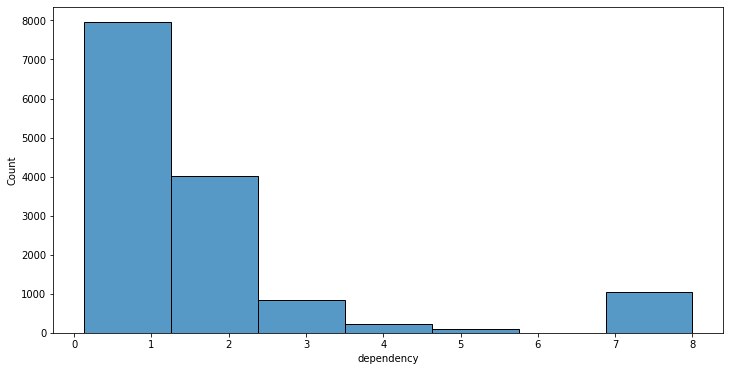

In [27]:
plt.figure(figsize=(12,6))
sns.histplot( x = dependency_values_test, bins = 7)
plt.show()

##### We will replace 'no' with 0 and 'yes' with median of 'dependency' column

In [28]:
train_data['dependency'] = train_data['dependency'].str.replace('no', '0')
test_data['dependency'] = test_data['dependency'].str.replace('no', '0')

In [29]:
median_dependency_train = train_data[train_data['dependency'] != 'yes']['dependency'].astype('float64').median()
median_dependency_test  = test_data[test_data['dependency'] != 'yes']['dependency'].astype('float64').median()

In [30]:
train_data['dependency'] = train_data['dependency'].str.replace('yes', str(median_dependency_train)).astype('float64')
test_data['dependency'] = test_data['dependency'].str.replace('yes', str(median_dependency_test)).astype('float64')

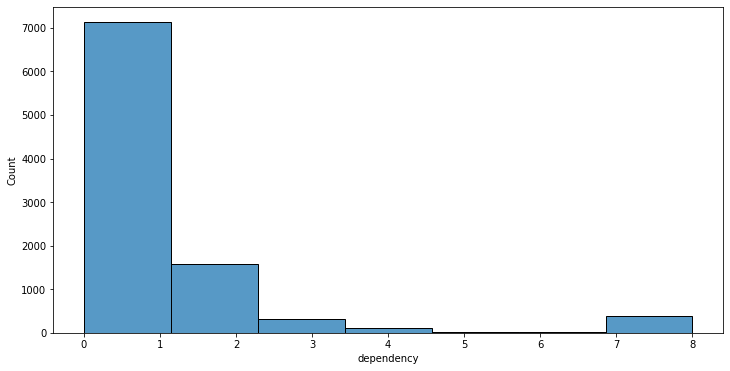

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'dependency', data = train_data, bins = 7);

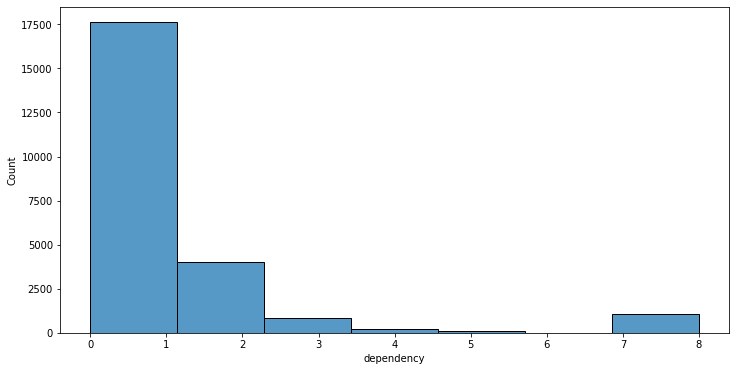

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'dependency', data = test_data, bins = 7);

In [34]:
train_data.dtypes[train_data.dtypes == 'object'] 

edjefe    object
edjefa    object
dtype: object

In [35]:
test_data.dtypes[train_data.dtypes == 'object'] 

edjefe    object
edjefa    object
dtype: object

In [36]:
train_data[['edjefe', 'edjefa']].isnull().sum()

edjefe    0
edjefa    0
dtype: int64

In [37]:
test_data[['edjefe', 'edjefa']].isnull().sum()

edjefe    0
edjefa    0
dtype: int64

In [38]:
train_data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [39]:
train_data['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [40]:
test_data['edjefe'].unique()

array(['no', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', 'yes', '19', '18'],
      dtype=object)

In [41]:
test_data['edjefa'].unique()

array(['17', 'no', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', 'yes', '7', '13', '21', '4', '19', '18', '20'],
      dtype=object)

In [42]:
train_data[['edjefe', 'edjefa']] = train_data[['edjefe', 'edjefa']].replace('no', '0')
test_data[['edjefe', 'edjefa']] = test_data[['edjefe', 'edjefa']].replace('no', '0')

In [43]:
edjefe_median_train = train_data[train_data['edjefe'] != 'yes']['edjefe'].astype('float64').median()
edjefe_median_test  = test_data[test_data['edjefe'] != 'yes']['edjefe'].astype('float64').median()

In [45]:
edjefa_median_train = train_data[train_data['edjefa'] != 'yes']['edjefa'].astype('float64').median()
edjefa_median_test  = test_data[test_data['edjefa'] != 'yes']['edjefa'].astype('float64').median()

In [46]:
train_data['edjefe'] = train_data['edjefe'].str.replace('yes', str(edjefe_median_train)).astype('float64')
test_data['edjefe'] = test_data['edjefe'].str.replace('yes', str(edjefe_median_test)).astype('float64')

In [47]:
train_data['edjefa'] = train_data['edjefa'].str.replace('yes', str(edjefa_median_train)).astype('float64')
test_data['edjefa'] = test_data['edjefa'].str.replace('yes', str(edjefa_median_test)).astype('float64')

In [48]:
train_data.dtypes.value_counts()

int64      130
float64     11
dtype: int64

In [49]:
test_data.dtypes.value_counts()

int64      129
float64     11
dtype: int64

In [50]:
non_categ_cols = [col for col in train_data.columns if ~train_data[col].isin([0,1]).all()]
non_categ_cols

['v2a1',
 'rooms',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'hogar_nin',
 'hogar_adul',
 'hogar_mayor',
 'hogar_total',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc',
 'bedrooms',
 'overcrowding',
 'qmobilephone',
 'age',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq',
 'Target']

<AxesSubplot:xlabel='v2a1', ylabel='Density'>

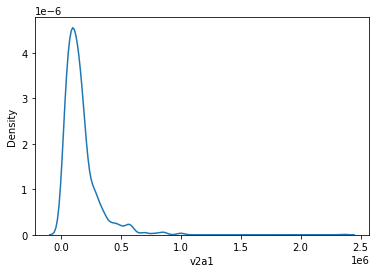

In [51]:
sns.kdeplot(train_data['v2a1'])  # Monthly Rent Payment

<AxesSubplot:xlabel='v2a1', ylabel='Count'>

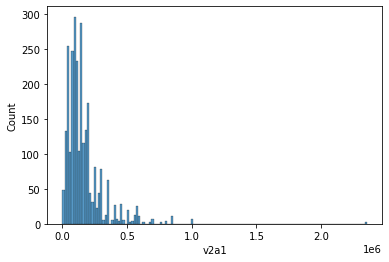

In [52]:
sns.histplot(train_data['v2a1'])  # Monthly Rent Payment

<AxesSubplot:xlabel='rooms', ylabel='count'>

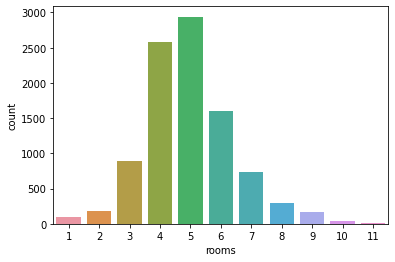

In [53]:
sns.countplot(x = 'rooms', data = train_data)

<AxesSubplot:xlabel='v18q1', ylabel='count'>

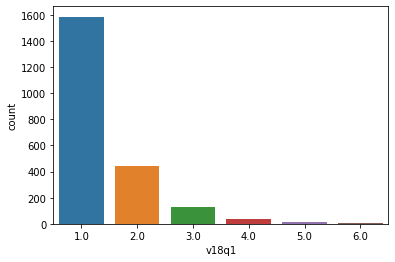

In [54]:
sns.countplot(x = 'v18q1', data = train_data) #number of tablets household owns

<AxesSubplot:xlabel='r4h1', ylabel='count'>

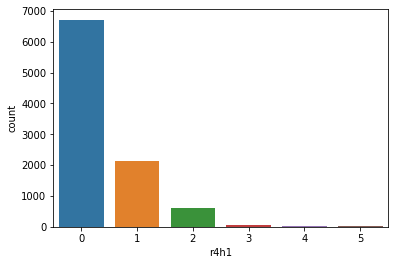

In [55]:
sns.countplot(x = 'r4h1', data = train_data) # Males younger than 12 years of age

<AxesSubplot:xlabel='r4h2', ylabel='count'>

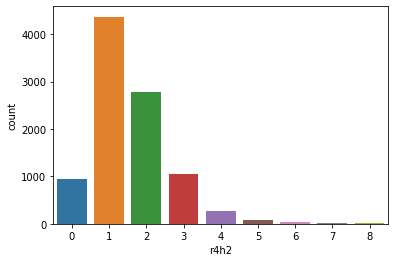

In [56]:
sns.countplot(x = 'r4h2', data = train_data )  # Males 12 years of age and older

<AxesSubplot:xlabel='r4h3', ylabel='count'>

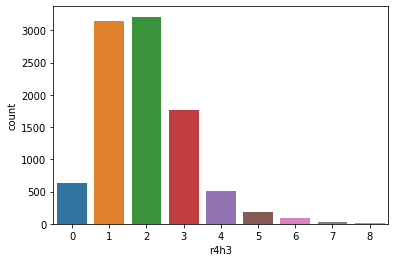

In [57]:
sns.countplot(x = 'r4h3', data = train_data )  # Total males in the household

<AxesSubplot:xlabel='r4m1', ylabel='count'>

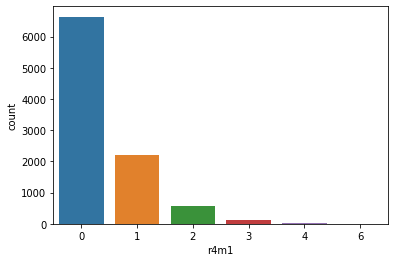

In [58]:
sns.countplot(x = 'r4m1' , data = train_data) # Females younger than 12 years of age

<AxesSubplot:xlabel='r4m2', ylabel='count'>

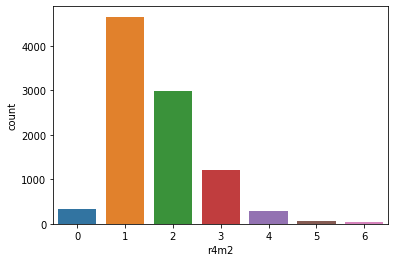

In [59]:
sns.countplot(x = 'r4m2' , data = train_data) # Females 12 years of age and older

<AxesSubplot:xlabel='r4m3', ylabel='count'>

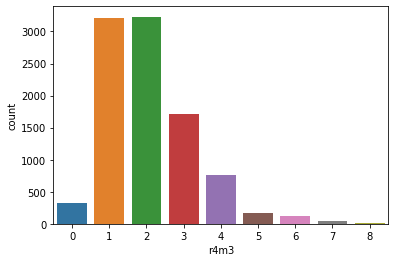

In [60]:
sns.countplot(x = 'r4m3' , data = train_data) # Total females in the household

<AxesSubplot:xlabel='r4t1', ylabel='count'>

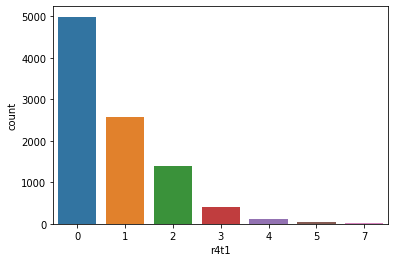

In [61]:
sns.countplot(x = 'r4t1', data = train_data) # persons younger than 12 years of age

<AxesSubplot:xlabel='r4t2', ylabel='count'>

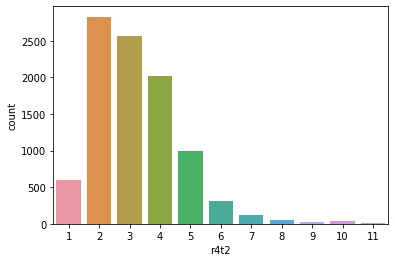

In [62]:
sns.countplot(x = 'r4t2', data = train_data) #persons 12 years of age and older

<AxesSubplot:xlabel='r4t3', ylabel='count'>

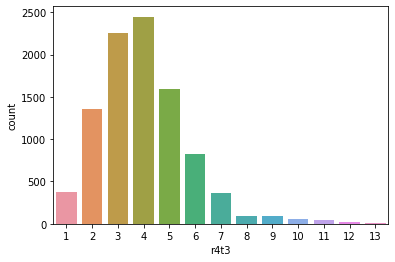

In [63]:
sns.countplot(x = 'r4t3' , data = train_data) # Total persons in the household

<AxesSubplot:xlabel='tamhog', ylabel='count'>

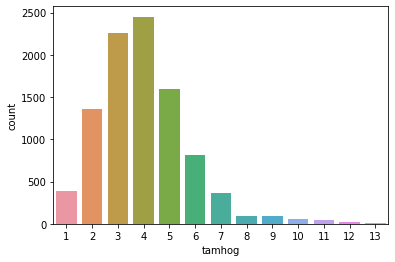

In [64]:
sns.countplot(x = 'tamhog', data = train_data) # size of the household

<AxesSubplot:xlabel='tamviv', ylabel='count'>

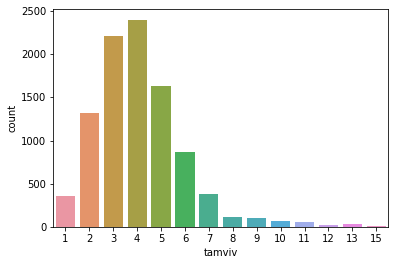

In [65]:
sns.countplot(x = 'tamviv', data = train_data) # number of persons living in the household

<AxesSubplot:xlabel='escolari', ylabel='count'>

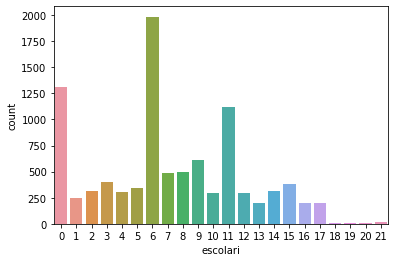

In [66]:
sns.countplot(x = 'escolari', data = train_data ) # years of schooling

<AxesSubplot:xlabel='rez_esc', ylabel='count'>

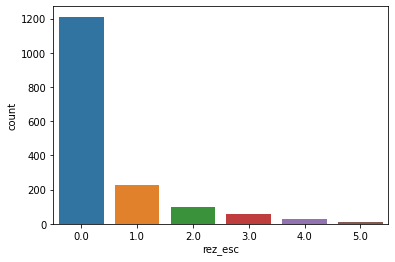

In [67]:
sns.countplot(x = 'rez_esc', data = train_data) # Years behind in school

<AxesSubplot:xlabel='hhsize', ylabel='count'>

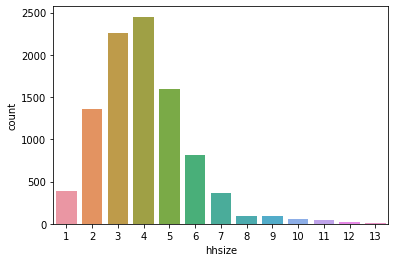

In [68]:
sns.countplot(x = 'hhsize', data = train_data) # household size

<AxesSubplot:xlabel='hogar_nin', ylabel='count'>

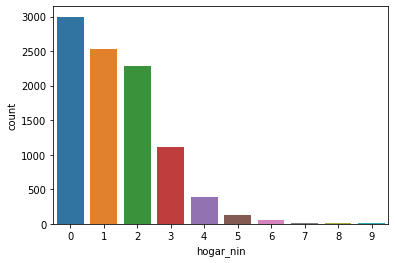

In [69]:
sns.countplot(x = 'hogar_nin', data = train_data) # Number of children 0 to 19 in household

<AxesSubplot:xlabel='hogar_adul', ylabel='count'>

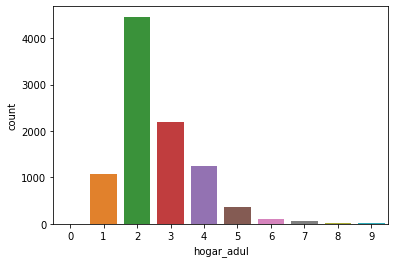

In [70]:
sns.countplot(x = 'hogar_adul', data = train_data) # Number of adults in household

<AxesSubplot:xlabel='hogar_mayor', ylabel='count'>

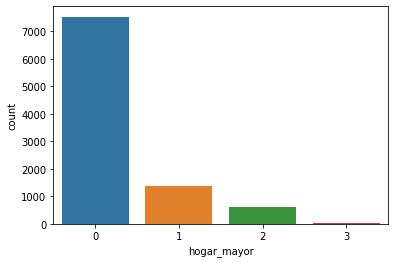

In [71]:
sns.countplot(x = 'hogar_mayor', data = train_data) # Number of individuals 65+ in the household

<AxesSubplot:xlabel='hogar_total', ylabel='count'>

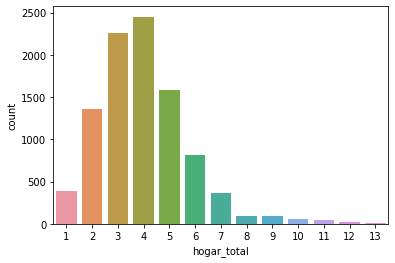

In [72]:
sns.countplot(x = 'hogar_total', data = train_data ) # Number of total individuals in the household

<AxesSubplot:xlabel='meaneduc', ylabel='Count'>

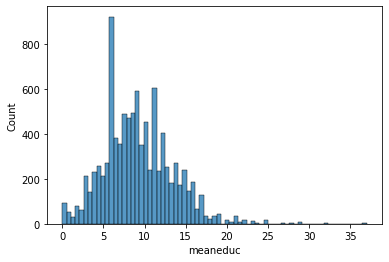

In [73]:
sns.histplot(x = 'meaneduc', data = train_data) # average years of education for adults (18+)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

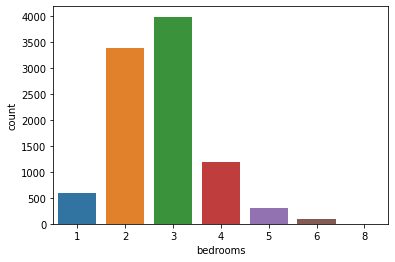

In [74]:
sns.countplot(x = 'bedrooms', data = train_data) # number of bedrooms

<AxesSubplot:xlabel='overcrowding', ylabel='Count'>

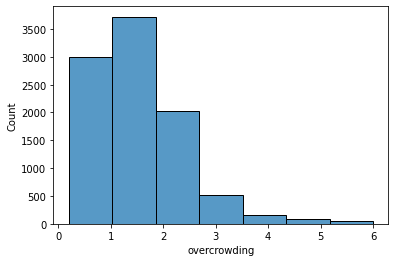

In [75]:
sns.histplot(x = 'overcrowding' , data = train_data, bins = 7) # Number of persons per room

In [76]:
train_data['overcrowding'].head()

0    1.000000
1    1.000000
2    0.500000
3    1.333333
4    1.333333
Name: overcrowding, dtype: float64

<AxesSubplot:xlabel='qmobilephone', ylabel='count'>

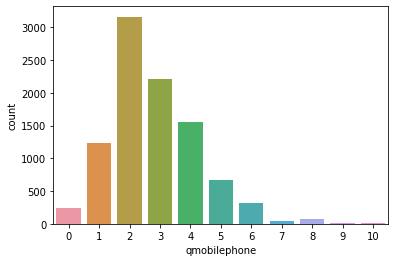

In [77]:
sns.countplot(x = 'qmobilephone' , data = train_data)

<AxesSubplot:xlabel='age', ylabel='Count'>

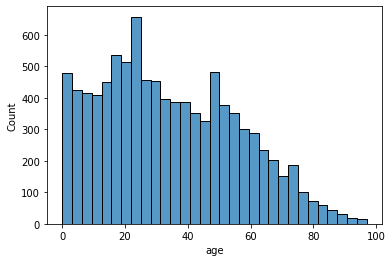

In [78]:
sns.histplot(x =  'age', data = train_data) # Age in years

<AxesSubplot:xlabel='SQBmeaned', ylabel='Count'>

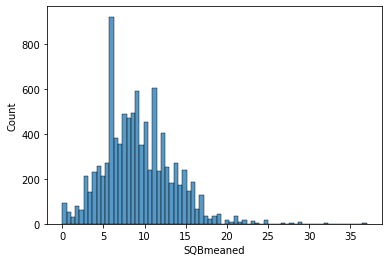

In [79]:
# SQBmeaned, square of the mean years of education of adults (>=18) in the household

mean_edu = np.sqrt(train_data['SQBmeaned'])

sns.histplot(x = mean_edu)

<AxesSubplot:xlabel='dependency', ylabel='Count'>

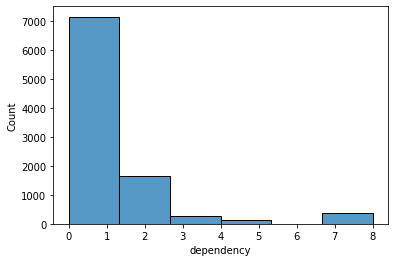

In [80]:
# Dependency rate, calculated = (number of members of the household
# younger than 19 or older than 64)/(number of member of household between 19 and 64)

sns.histplot(x = 'dependency', data = train_data, bins = 6) 

<AxesSubplot:xlabel='edjefe', ylabel='Count'>

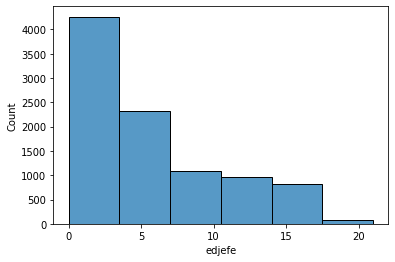

In [81]:
sns.histplot(x = 'edjefe', data = train_data, bins = 6)  # years of education of male head of household

<AxesSubplot:xlabel='edjefa', ylabel='Count'>

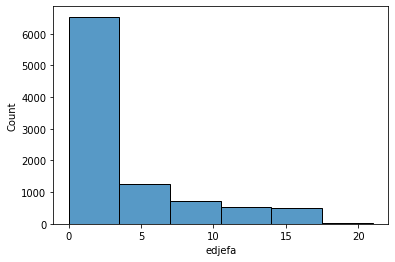

In [82]:
sns.histplot(x = 'edjefa', data = train_data, bins = 6) # years of education of female head of household

In [83]:
train_data['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [84]:
round(train_data['Target'].value_counts()/train_data.shape[0]*100, 2) # percent of target classes present in dataset

4    62.74
2    16.71
3    12.65
1     7.90
Name: Target, dtype: float64

In [96]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

In [86]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]/train_data.shape[0]*100 # % of null values across columns (train_data)

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [ ]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]/test_data.shape[0]*100 # % of null values across columns (test_data)

In [87]:
train_data.drop(['v2a1','v18q1','rez_esc'], axis=1, inplace=True)
test_data.drop(['v2a1','v18q1','rez_esc'], axis=1, inplace=True)

In [88]:
train_data[['meaneduc', 'SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,9552.000000,9552.000000
mean,9.231523,102.588867
std,4.167694,93.516890
min,0.000000,0.000000
25%,6.000000,36.000000
50%,9.000000,81.000000
75%,11.600000,134.560010
max,37.000000,1369.000000


In [89]:
test_data[['meaneduc', 'SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,23825.000000,23825.000000
mean,9.157474,100.509220
std,4.080513,89.211063
min,0.000000,0.000000
25%,6.000000,36.000000
50%,8.666667,75.111115
75%,11.500000,132.250000
max,36.000000,1296.000000


In [90]:
train_data[['meaneduc', 'SQBmeaned']] = train_data[['meaneduc', 'SQBmeaned']].fillna(
                                                                            train_data[['meaneduc', 'SQBmeaned']].median())

In [91]:
test_data[['meaneduc', 'SQBmeaned']] = test_data[['meaneduc', 'SQBmeaned']].fillna(
                                                                            test_data[['meaneduc', 'SQBmeaned']].median())

In [94]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [95]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)